In [1]:
# Random Forest Classification
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.ensemble import IsolationForest

import warnings
warnings.filterwarnings("ignore")


In [2]:
df=pd.read_csv("Fraud_check.csv")

In [3]:
df.head()

,Undergrad,MaritalStatus,TaxableIncome,CityPopulation,WorkExperience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Undergrad       600 non-null    object
 1   MaritalStatus   600 non-null    object
 2   TaxableIncome   600 non-null    int64 
 3   CityPopulation  600 non-null    int64 
 4   WorkExperience  600 non-null    int64 
 5   Urban           600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [5]:
df[df.duplicated()]

,Undergrad,MaritalStatus,TaxableIncome,CityPopulation,WorkExperience,Urban


In [6]:
df['MaritalStatus'].unique()

array(['Single', 'Divorced', 'Married'], dtype=object)

<AxesSubplot:>

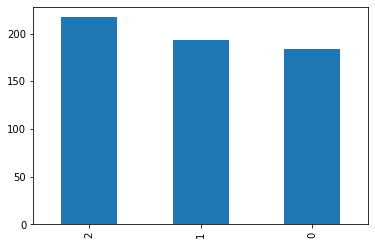

In [33]:
df.MaritalStatus.value_counts().plot(kind='bar') 

(array([107., 133., 115., 117., 122.]),
 array([10003. , 27926.2, 45849.4, 63772.6, 81695.8, 99619. ]),
 <BarContainer object of 5 artists>)

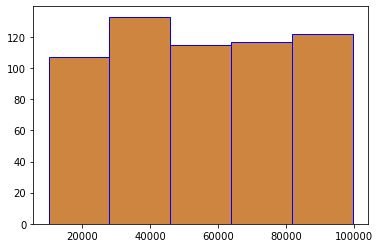

In [34]:
plt.hist(df['TaxableIncome'],facecolor ="peru",edgecolor ="blue",bins =5)

In [7]:
#Encoding few columns in the dataframe
label_encoder = preprocessing.LabelEncoder()
df['Undergrad']=label_encoder.fit_transform(df['Undergrad'])
df['MaritalStatus']=label_encoder.fit_transform(df['MaritalStatus'])
df['Urban']=label_encoder.fit_transform(df['Urban'])


In [8]:
df

,Undergrad,MaritalStatus,TaxableIncome,CityPopulation,WorkExperience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


In [9]:
df['MaritalStatus'].value_counts()

2    217
1    194
0    189
Name: MaritalStatus, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x2f4376da160>,
 'caps': [<matplotlib.lines.Line2D at 0x2f4376da7c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2f4376becd0>],
 'medians': [<matplotlib.lines.Line2D at 0x2f4376daee0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2f4376e92b0>],
 'means': []}

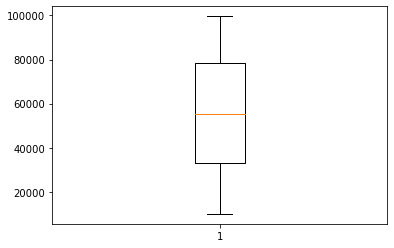

In [10]:
plt.boxplot(df['TaxableIncome'],vert = True)

{'whiskers': [<matplotlib.lines.Line2D at 0x2f4377cb2b0>,
 'caps': [<matplotlib.lines.Line2D at 0x2f4377cb9d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2f4377bcee0>],
 'medians': [<matplotlib.lines.Line2D at 0x2f4377d9130>],
 'fliers': [<matplotlib.lines.Line2D at 0x2f4377d94c0>],
 'means': []}

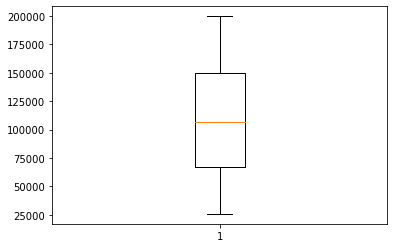

In [11]:
plt.boxplot(df['CityPopulation'],vert = True)

In [12]:
# training the model
clf = IsolationForest(random_state=10,contamination=.01)
clf.fit(df)

IsolationForest(contamination=0.01, random_state=10)

In [13]:
# predictions
y_pred_outliers = clf.predict(df)

In [14]:
#-1 for outliers and 1 for inliers.
y_pred_outliers

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [15]:
df['Outliers']=y_pred_outliers # to assign a separate Outliers column 

In [16]:
df

,Undergrad,MaritalStatus,TaxableIncome,CityPopulation,WorkExperience,Urban,Outliers
0,0,2,68833,50047,10,1,1
1,1,0,33700,134075,18,1,1
2,0,1,36925,160205,30,1,1
3,1,2,50190,193264,15,1,1
4,0,1,81002,27533,28,0,1
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,1
596,1,0,69967,55369,2,1,1
597,0,0,47334,154058,0,1,1
598,1,1,98592,180083,17,0,1


In [17]:
df[df.Outliers==-1] # to display the rows which has outliers

,Undergrad,MaritalStatus,TaxableIncome,CityPopulation,WorkExperience,Urban,Outliers
34,1,0,12514,183767,1,1,-1
119,0,0,97318,47202,30,1,-1
161,1,1,93659,185596,30,1,-1
280,0,0,17783,33184,1,0,-1
414,0,0,97980,27300,1,1,-1
541,1,0,12453,191874,30,1,-1


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Undergrad       600 non-null    int32
 1   MaritalStatus   600 non-null    int32
 2   TaxableIncome   600 non-null    int64
 3   CityPopulation  600 non-null    int64
 4   WorkExperience  600 non-null    int64
 5   Urban           600 non-null    int32
 6   Outliers        600 non-null    int32
dtypes: int32(4), int64(3)
memory usage: 23.6 KB


In [19]:
row=(34,119,161,280,414,541)
for i in row:
    df.drop(i,axis=0,inplace=True)



In [20]:
df

,Undergrad,MaritalStatus,TaxableIncome,CityPopulation,WorkExperience,Urban,Outliers
0,0,2,68833,50047,10,1,1
1,1,0,33700,134075,18,1,1
2,0,1,36925,160205,30,1,1
3,1,2,50190,193264,15,1,1
4,0,1,81002,27533,28,0,1
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,1
596,1,0,69967,55369,2,1,1
597,0,0,47334,154058,0,1,1
598,1,1,98592,180083,17,0,1


In [21]:
 #shift column 'TaxableIncome' to first position
first_column = df.pop('TaxableIncome')


In [22]:
# insert column using insert(position,column_name,
# first_column) function
df.insert(0, 'TaxableIncome', first_column)

In [23]:
df

,TaxableIncome,Undergrad,MaritalStatus,CityPopulation,WorkExperience,Urban,Outliers
0,68833,0,2,50047,10,1,1
1,33700,1,0,134075,18,1,1
2,36925,0,1,160205,30,1,1
3,50190,1,2,193264,15,1,1
4,81002,0,1,27533,28,0,1
...,...,...,...,...,...,...,...
595,76340,1,0,39492,7,1,1
596,69967,1,0,55369,2,1,1
597,47334,0,0,154058,0,1,1
598,98592,1,1,180083,17,0,1


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 594 entries, 0 to 599
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   TaxableIncome   594 non-null    int64
 1   Undergrad       594 non-null    int32
 2   MaritalStatus   594 non-null    int32
 3   CityPopulation  594 non-null    int64
 4   WorkExperience  594 non-null    int64
 5   Urban           594 non-null    int32
 6   Outliers        594 non-null    int32
dtypes: int32(4), int64(3)
memory usage: 27.8 KB


In [25]:
userindex = df.index[df['TaxableIncome'] >= 30000]
df.loc[userindex, ["Taxable"]] = "True"

In [26]:
pd.set_option('display.max_rows', None)
df 

,TaxableIncome,Undergrad,MaritalStatus,CityPopulation,WorkExperience,Urban,Outliers,Taxable
0,68833,0,2,50047,10,1,1,True
1,33700,1,0,134075,18,1,1,True
2,36925,0,1,160205,30,1,1,True
3,50190,1,2,193264,15,1,1,True
4,81002,0,1,27533,28,0,1,True
5,33329,0,0,116382,0,0,1,True
6,83357,0,0,80890,8,1,1,True
7,62774,1,2,131253,3,1,1,True
8,83519,0,2,102481,12,1,1,True
9,98152,1,0,155482,4,1,1,True


In [27]:
df.fillna('False')

,TaxableIncome,Undergrad,MaritalStatus,CityPopulation,WorkExperience,Urban,Outliers,Taxable
0,68833,0,2,50047,10,1,1,True
1,33700,1,0,134075,18,1,1,True
2,36925,0,1,160205,30,1,1,True
3,50190,1,2,193264,15,1,1,True
4,81002,0,1,27533,28,0,1,True
5,33329,0,0,116382,0,0,1,True
6,83357,0,0,80890,8,1,1,True
7,62774,1,2,131253,3,1,1,True
8,83519,0,2,102481,12,1,1,True
9,98152,1,0,155482,4,1,1,True


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 594 entries, 0 to 599
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   TaxableIncome   594 non-null    int64 
 1   Undergrad       594 non-null    int32 
 2   MaritalStatus   594 non-null    int32 
 3   CityPopulation  594 non-null    int64 
 4   WorkExperience  594 non-null    int64 
 5   Urban           594 non-null    int32 
 6   Outliers        594 non-null    int32 
 7   Taxable         473 non-null    object
dtypes: int32(4), int64(3), object(1)
memory usage: 48.6+ KB


In [29]:
df['Taxable']=label_encoder.fit_transform(df['Taxable'])

In [30]:
df

,TaxableIncome,Undergrad,MaritalStatus,CityPopulation,WorkExperience,Urban,Outliers,Taxable
0,68833,0,2,50047,10,1,1,0
1,33700,1,0,134075,18,1,1,0
2,36925,0,1,160205,30,1,1,0
3,50190,1,2,193264,15,1,1,0
4,81002,0,1,27533,28,0,1,0
5,33329,0,0,116382,0,0,1,0
6,83357,0,0,80890,8,1,1,0
7,62774,1,2,131253,3,1,1,0
8,83519,0,2,102481,12,1,1,0
9,98152,1,0,155482,4,1,1,0


In [31]:
array = df.values
X = array[:,1:6]
Y = array[:,-1]
num_trees = 100
max_features = 3
kfold = KFold(n_splits=10, random_state=7, shuffle = True)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean()) 

0.7506779661016949


In [32]:
# Stacking Ensemble for Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier


array = df.values
X = array[:,1:6]
Y = array[:,-1]
kfold = KFold(n_splits=10, random_state=7, shuffle = True)

# create the sub models
estimators = []
model1 = LogisticRegression(max_iter=500)
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, X, Y, cv=kfold)
print(results.mean())

0.7961864406779661
